# Cluster Analysis (6 Clusters)

## Contents
### 1. Importing Libraries and Data and Creating a subset
### 2. Standardizing the Data
### 3. The Elbow Technique
### 4. k-means Clustering
### 5. Cluster profiles

## 1. Importing Libraries and Data and Creating a Subset

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [9]:
df = pd.read_pickle(os.path.join(r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/09-2024 A6 Spotify Analysis/02 Data/Prepared Data/fulldf9_27.pkl'))

In [11]:
sub = df[['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']]

## 2. Standardizing the Data

In [21]:
# Check data types
sub.dtypes

popularity          float64
duration_ms         float64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
song_count          float64
dtype: object

In [19]:
import scipy 
from scipy import stats 

# Using sub.loc to avoid the warning
sub.loc[:, ['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']] = stats.zscore(sub[['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']])

/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_22624/2203704336.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.40080635 1.46359985 1.21242583 ... 0.71007778 0.71007778 1.08683882]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sub.loc[:, ['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_22624/2203704336.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.18523135  0.35975014 -0.7016171  ... -0.1516428  -0.25621228
 -1.19977643]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sub.loc[:, ['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_22624/2203704336.py:5: F

In [23]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count
0,1.400806,1.185231,-1.203716,-0.374073,-0.523503,-0.719252,0.150202,-0.190842,-0.388029,-0.065189,1.270303,0.203871
1,1.463600,0.359750,0.444824,-0.897904,-1.451228,-0.659117,-0.283294,0.455535,-0.428339,-0.490683,-0.617261,2.348628
2,1.212426,-0.701617,-0.087669,1.567182,0.906835,-0.345076,-0.680665,-0.190842,1.022820,0.750705,-0.332796,-0.158964
3,1.086839,-0.429589,-0.189791,0.636612,1.039755,-0.701434,-1.074463,-0.190842,0.184372,1.263929,-0.223441,0.470454
4,1.275219,-0.338193,0.109281,0.661263,0.367406,-0.740411,-0.656582,-0.190146,0.119876,0.614723,-0.653202,3.048093


## 3. The Elbow Technique

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [30]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-14678112.00000269,
 -12616539.41900609,
 -11481821.293844823,
 -10548803.033943735,
 -9825711.511661807,
 -9190199.886373464,
 -8747577.463033091,
 -8413055.095208682,
 -8152056.639068633]

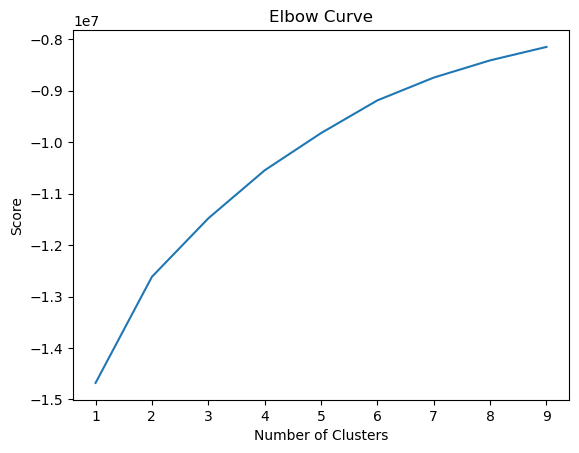

In [32]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### My tutor said this looks like 5-8 clusters are reasonable. I'm going to go with 6. I'm also going to opt out of the silhouette analysis for now. Maybe I'll circle back to it later.

## 4. k-means Clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 

In [39]:
# Fit the k-means object to the data.

kmeans.fit(sub)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [41]:
sub['clusters'] = kmeans.fit_predict(sub)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_22624/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [43]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count,clusters
0,1.400806,1.185231,-1.203716,-0.374073,-0.523503,-0.719252,0.150202,-0.190842,-0.388029,-0.065189,1.270303,0.203871,4
1,1.463600,0.359750,0.444824,-0.897904,-1.451228,-0.659117,-0.283294,0.455535,-0.428339,-0.490683,-0.617261,2.348628,2
2,1.212426,-0.701617,-0.087669,1.567182,0.906835,-0.345076,-0.680665,-0.190842,1.022820,0.750705,-0.332796,-0.158964,0
3,1.086839,-0.429589,-0.189791,0.636612,1.039755,-0.701434,-1.074463,-0.190842,0.184372,1.263929,-0.223441,0.470454,2
4,1.275219,-0.338193,0.109281,0.661263,0.367406,-0.740411,-0.656582,-0.190146,0.119876,0.614723,-0.653202,3.048093,2


In [45]:
sub['clusters'] = kmeans.labels_

/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_22624/1651704096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.labels_


In [47]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count,clusters
0,1.400806,1.185231,-1.203716,-0.374073,-0.523503,-0.719252,0.150202,-0.190842,-0.388029,-0.065189,1.270303,0.203871,4
1,1.463600,0.359750,0.444824,-0.897904,-1.451228,-0.659117,-0.283294,0.455535,-0.428339,-0.490683,-0.617261,2.348628,2
2,1.212426,-0.701617,-0.087669,1.567182,0.906835,-0.345076,-0.680665,-0.190842,1.022820,0.750705,-0.332796,-0.158964,0
3,1.086839,-0.429589,-0.189791,0.636612,1.039755,-0.701434,-1.074463,-0.190842,0.184372,1.263929,-0.223441,0.470454,2
4,1.275219,-0.338193,0.109281,0.661263,0.367406,-0.740411,-0.656582,-0.190146,0.119876,0.614723,-0.653202,3.048093,2


In [49]:
sub['clusters'].value_counts()

clusters
1    420630
4    224864
2    224790
0    197231
5    134486
3     21175
Name: count, dtype: int64

In [53]:
# display all columns
pd.set_option('display.max_columns', None)

In [55]:
sub.groupby('clusters').agg({'popularity':['mean', 'median'], 
                         'duration_ms':['mean', 'median'], 
                         'danceability':['mean', 'median'],
                          'energy':['mean', 'median'],
                          'loudness':['mean', 'median'], 
                         'speechiness':['mean', 'median'], 
                         'acousticness':['mean', 'median'],
                          'instrumentalness':['mean', 'median'],
                          'liveness':['mean', 'median'], 
                         'valence':['mean', 'median'], 
                         'tempo':['mean', 'median'],
                          'song_count':['mean', 'median']})

popularity           duration_ms           danceability            \
               mean    median        mean    median         mean    median   
clusters                                                                     
0         -0.001543  0.207730    0.150324 -0.037598    -0.637858 -0.561807   
1         -0.249007 -0.043444   -0.122486 -0.256292     0.543546  0.598007   
2          0.896748  0.898458   -0.129581 -0.241339     0.238792  0.182225   
3         -0.179867  0.082143    0.217396 -0.295433    -0.004099  0.262464   
4         -0.110801  0.019349    0.362044  0.271013    -0.927696 -1.028650   
5         -0.504230 -0.545792   -0.260345 -0.397344     0.388054  0.525063   

            energy            loudness           speechiness            \
              mean    median      mean    median        mean    median   
clusters                                                                 
0         0.574000  0.581147  0.401017  0.443748   -0.170254 -0.433052   
1         0.358346  0.334639  0.304829  0.343768   -0.200187 -0.351758   
2         0.193287  0.328476  0.459371  0.566979   -0.355035 -0.547755   
3        -0.232157 -0.213843 -1.216444 -0.999379   -0.259765 -0.468688   
4        -1.285220 -1.236853 -1.114340 -0.888935   -0.451269 -0.620140   
5        -0.100196 -0.059775 -0.254613 -0.179773    2.264674  2.160565   

         acousticness           instrumentalness            liveness  \
                 mean    median             mean    median      mean   
clusters                                                               
0           -0.460490 -0.648554        -0.143632 -0.190842  1.185301   
1           -0.235982 -0.411737        -0.116791 -0.190826 -0.251148   
2           -0.466512 -0.656582        -0.145311 -0.190822 -0.333777   
3           -0.163160 -0.512083         6.725087  6.995849 -0.145420   
4            1.311647  1.434633        -0.047479 -0.190819 -0.153587   
5            0.025758 -0.239141        -0.160674 -0.190830 -0.115198   

                     valence               tempo           song_count  \
            median      mean    median      mean    median       mean   
clusters                                                                
0         1.143750 -0.100860 -0.052030  0.793334  0.822732  -0.349722   
1        -0.460587  0.396199  0.474354 -0.281999 -0.331193  -0.464246   
2        -0.452525  0.122476  0.215549 -0.231880 -0.542707   1.729754   
3        -0.476711 -0.463040 -0.266970 -0.082463 -0.084129  -0.414791   
4        -0.436401 -0.728658 -0.810900 -0.091266 -0.156510  -0.270442   
5        -0.428339 -0.004744 -0.069576  0.271702  0.273572  -0.408843   

                    
            median  
clusters            
0        -0.563625  
1        -0.595877  
2         1.611368  
3        -0.569168  
4        -0.578743  
5        -0.632665

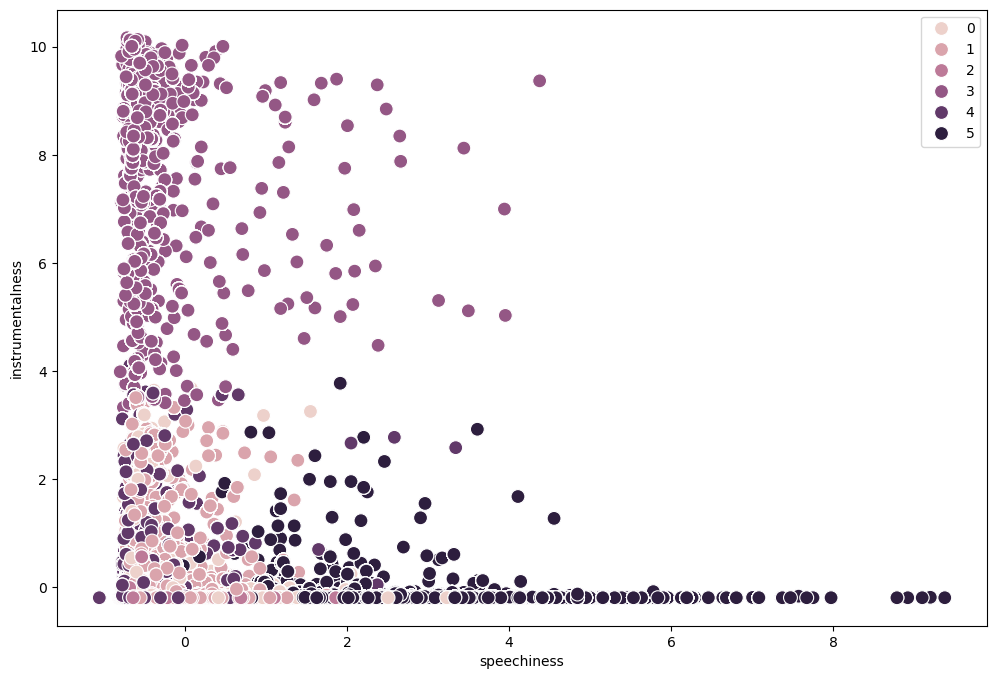

In [57]:
# Plot the clusters for the "speechiness" and "instrumentalness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['speechiness'], y=sub['instrumentalness'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('speechiness') # Label x-axis.
plt.ylabel('instrumentalness') # Label y-axis.
plt.show()

#### Every high instrumentalness track is in group 3. Every high speechiness track is in group 5. It makes sense that these two clusters would be opposite like this. What I'm confused about is the fact that there should be negative values here, due to the fact that we're plotting z-scores.

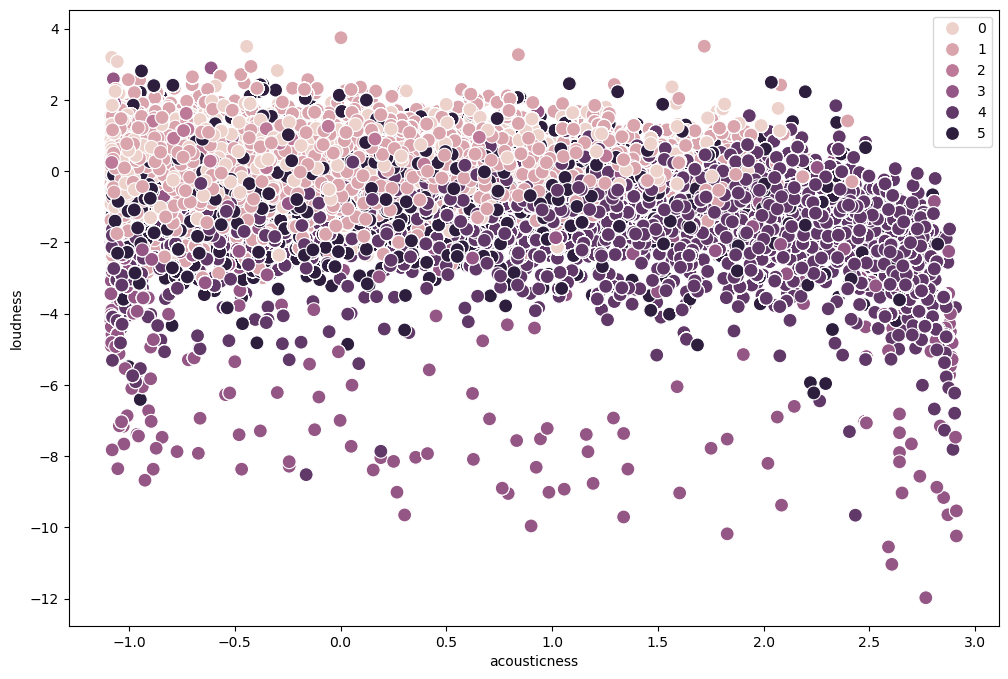

In [61]:
# Plot the clusters for the "acousticness" and "loudness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['acousticness'], y=sub['loudness'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('acousticness') # Label x-axis.
plt.ylabel('loudness') # Label y-axis.
plt.show()

#### Cluster 3 is the quietest (also the most instrumental). The acousticness varies very much. Barely any cluster 0, 1, or 2 have an acousticness higher than 2. Those same groups are also on the louder side (rarely below -2).

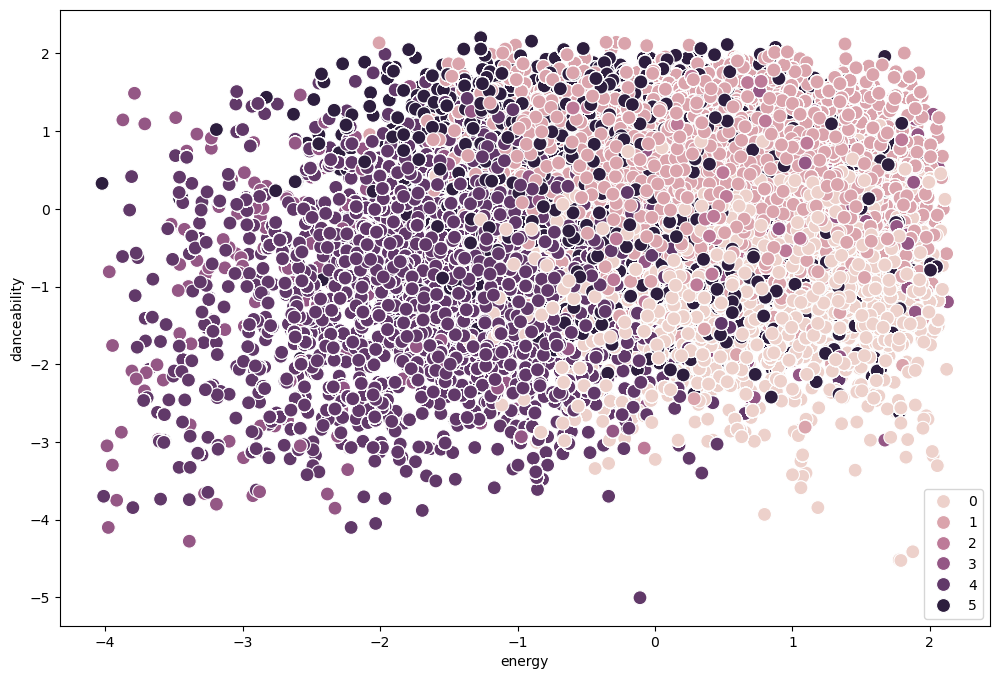

In [65]:
# Plot the clusters for the "energy" and "danceability" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['energy'], y=sub['danceability'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('energy') # Label x-axis.
plt.ylabel('danceability') # Label y-axis.
plt.show()

#### Cluster 0 has high energy, medium danceabiltiy
#### Cluster 1 has high energy, high danceability
#### Cluster 3 has lowish energy, varying danceability
#### Cluster 4 has low energy, varying danceability
#### Cluster 5 has has varying energy, high danceability

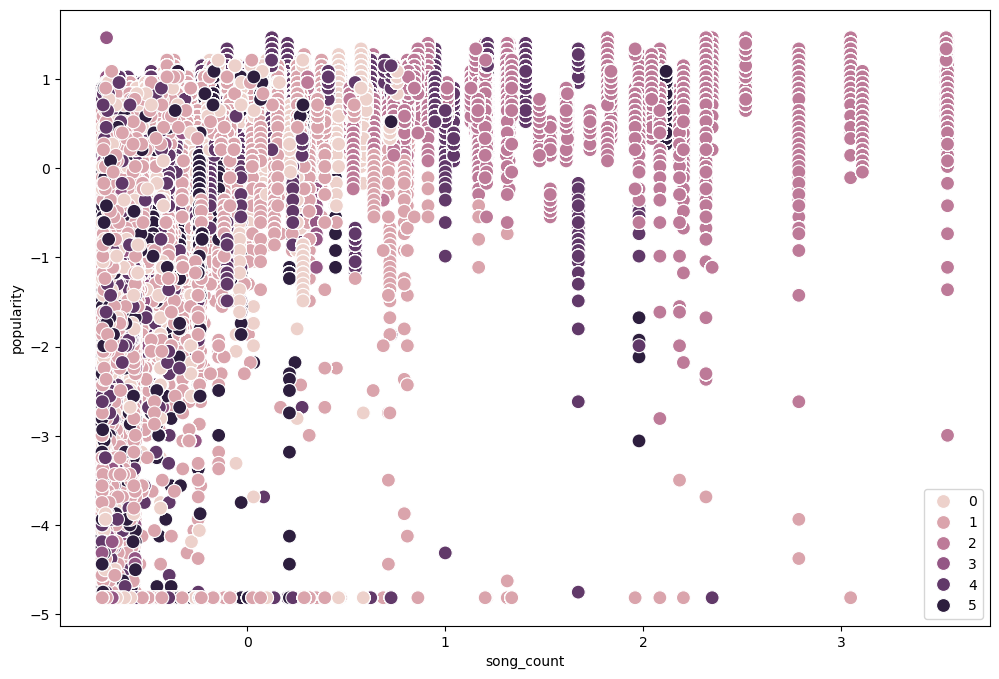

In [70]:
# Plot the clusters for the "song_count" and "popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['song_count'], y=sub['popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('song_count') # Label x-axis.
plt.ylabel('popularity') # Label y-axis.
plt.show()

#### I expected these two metrics to be highly correlated, but it's less than I thought.
#### Cluster 2 has the highest song count and popularity.
#### Cluster 4 has a medium song count, but high popularity

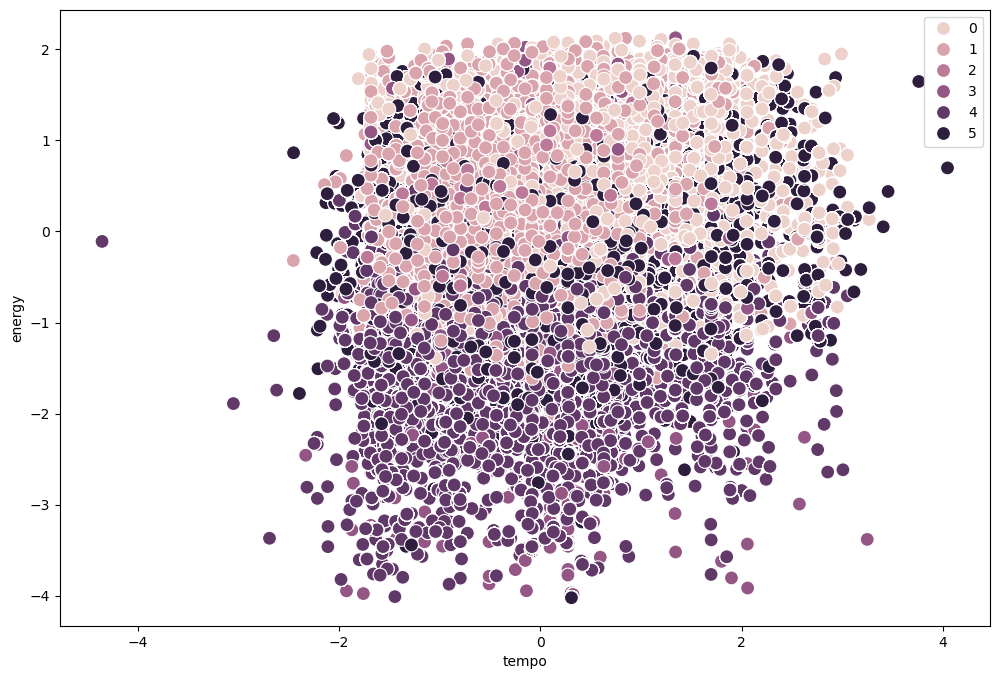

In [73]:
# Plot the clusters for the "tempo" and "energy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['tempo'], y=sub['energy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('tempo') # Label x-axis.
plt.ylabel('energy') # Label y-axis.
plt.show()

#### Clusters 0, 1, and 2 are high energy
#### Clusters 3 and 4 are low energy

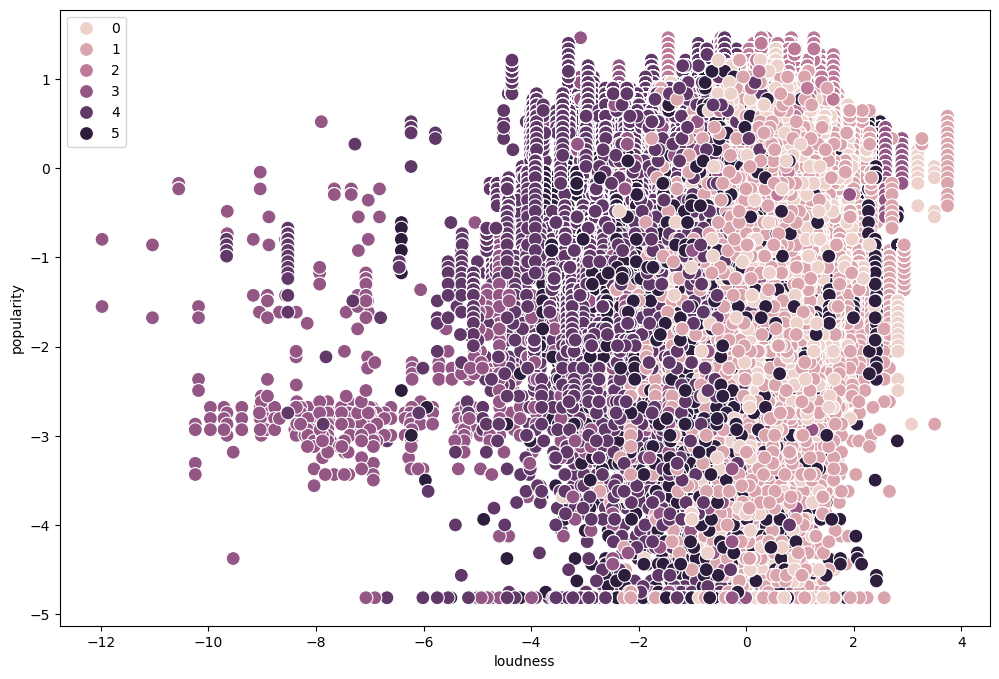

In [76]:
# Plot the clusters for the "loudness" and "popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['loudness'], y=sub['popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('loudness') # Label x-axis.
plt.ylabel('popularity') # Label y-axis.
plt.show()

#### Clusters 0, 1, and 2 are all loud. 3 is the most popular
#### The quietest is still 3, with mostly middling to low popularity
#### 4 has large variations in popularity, middling in loudness.
#### 5 is generally quite loud , varies in popularity

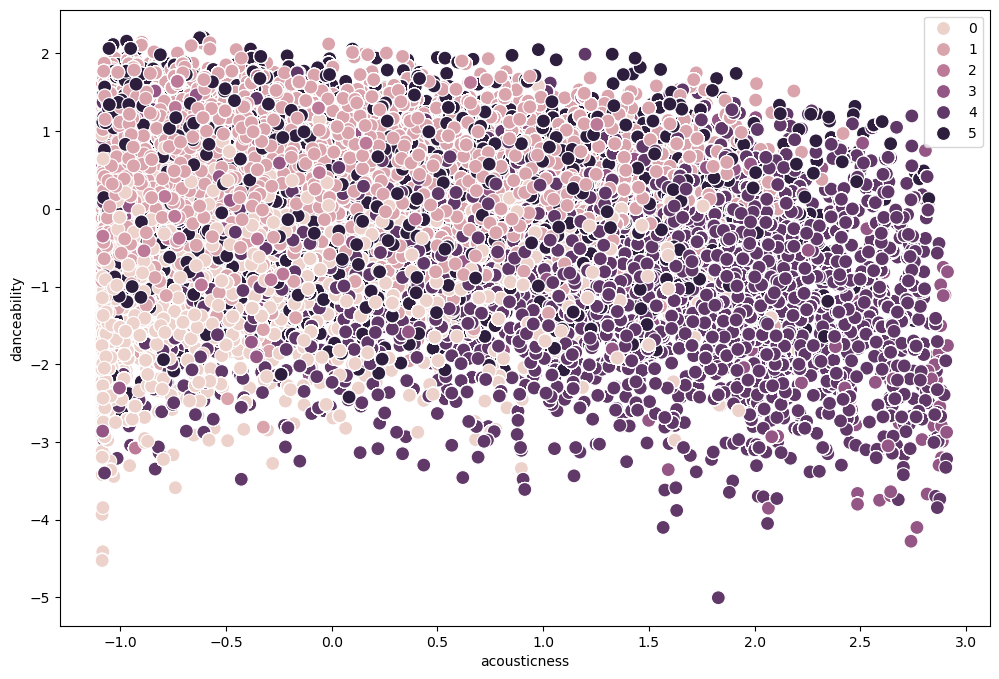

In [79]:
# Plot the clusters for the "acousticness" and "danceability" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['acousticness'], y=sub['danceability'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('acousticness') # Label x-axis.
plt.ylabel('danceability') # Label y-axis.
plt.show()

#### 4 has high acousticness
#### 0 has low acousticness
#### 1 and 2 have low acousticness, high danceability

In [55]:
sub.groupby('clusters').agg({'popularity':['mean', 'median'], 
                         'duration_ms':['mean', 'median'], 
                         'danceability':['mean', 'median'],
                          'energy':['mean', 'median'],
                          'loudness':['mean', 'median'], 
                         'speechiness':['mean', 'median'], 
                         'acousticness':['mean', 'median'],
                          'instrumentalness':['mean', 'median'],
                          'liveness':['mean', 'median'], 
                         'valence':['mean', 'median'], 
                         'tempo':['mean', 'median'],
                          'song_count':['mean', 'median']})

popularity           duration_ms           danceability            \
               mean    median        mean    median         mean    median   
clusters                                                                     
0         -0.001543  0.207730    0.150324 -0.037598    -0.637858 -0.561807   
1         -0.249007 -0.043444   -0.122486 -0.256292     0.543546  0.598007   
2          0.896748  0.898458   -0.129581 -0.241339     0.238792  0.182225   
3         -0.179867  0.082143    0.217396 -0.295433    -0.004099  0.262464   
4         -0.110801  0.019349    0.362044  0.271013    -0.927696 -1.028650   
5         -0.504230 -0.545792   -0.260345 -0.397344     0.388054  0.525063   

            energy            loudness           speechiness            \
              mean    median      mean    median        mean    median   
clusters                                                                 
0         0.574000  0.581147  0.401017  0.443748   -0.170254 -0.433052   
1         0.358346  0.334639  0.304829  0.343768   -0.200187 -0.351758   
2         0.193287  0.328476  0.459371  0.566979   -0.355035 -0.547755   
3        -0.232157 -0.213843 -1.216444 -0.999379   -0.259765 -0.468688   
4        -1.285220 -1.236853 -1.114340 -0.888935   -0.451269 -0.620140   
5        -0.100196 -0.059775 -0.254613 -0.179773    2.264674  2.160565   

         acousticness           instrumentalness            liveness  \
                 mean    median             mean    median      mean   
clusters                                                               
0           -0.460490 -0.648554        -0.143632 -0.190842  1.185301   
1           -0.235982 -0.411737        -0.116791 -0.190826 -0.251148   
2           -0.466512 -0.656582        -0.145311 -0.190822 -0.333777   
3           -0.163160 -0.512083         6.725087  6.995849 -0.145420   
4            1.311647  1.434633        -0.047479 -0.190819 -0.153587   
5            0.025758 -0.239141        -0.160674 -0.190830 -0.115198   

                     valence               tempo           song_count  \
            median      mean    median      mean    median       mean   
clusters                                                                
0         1.143750 -0.100860 -0.052030  0.793334  0.822732  -0.349722   
1        -0.460587  0.396199  0.474354 -0.281999 -0.331193  -0.464246   
2        -0.452525  0.122476  0.215549 -0.231880 -0.542707   1.729754   
3        -0.476711 -0.463040 -0.266970 -0.082463 -0.084129  -0.414791   
4        -0.436401 -0.728658 -0.810900 -0.091266 -0.156510  -0.270442   
5        -0.428339 -0.004744 -0.069576  0.271702  0.273572  -0.408843   

                    
            median  
clusters            
0        -0.563625  
1        -0.595877  
2         1.611368  
3        -0.569168  
4        -0.578743  
5        -0.632665

### 5. Cluster profiles:
#### 0: High energy, high loudness, low acousticness, high liveness, high tempo
#### 1: High danceability, high valence, low tempo, low song count
#### 2: High popularity, high loudness, low acousticness, low liveness, low tempo, high song count
#### 3: Low loudness, high instrumentalness
#### 4: High duration, low danceability, low energy, low loudness, low speechiness, high acousticness, low valence
#### 5: Low popularity, low duration, high speechiness

In [84]:
# Export subset
sub.to_pickle(os.path.join(r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/09-2024 A6 Spotify Analysis/02 Data/Prepared Data/sub_clusters'))

### I'd like to try this with more clusters as well. I'm looking forward to seeing how these clusters interact with the geography.